In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Get the data

  * The data are 12 files containing the business sales (one for each month)
  * All 12 files are stored on a folder name "Sales Data"
  * The path to get there is the following (on my computer)
      * '.\\Desktop\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales Data'

### Merge/Combine all the files into a singe one

In [2]:
#Get the file names
files = [file for file in os.listdir('.\\Desktop\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales Data')]

#Create a pandas df object
all_months_data = pd.DataFrame()

#Loop on every file in the folder and store them on the pandas df
for file in files:
    df = pd.read_csv('.\\Desktop\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales Data\\'+file)
    all_months_data = pd.concat([all_months_data,df])
    print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### Complete data

   * Checking the data it´s everything it´s fine
   * Also get one file which contains all the data, it´s helpfull not reading all that data from the loop

In [3]:
all_months_data.to_csv('.\\Desktop\\all_data_months.csv',index=False)

In [4]:
data = all_months_data.copy()

In [5]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
data.dropna(axis=0,inplace=True,how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
all_months_data.shape

(186850, 6)

In [8]:
data.shape

(186305, 6)

In [9]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [10]:
all_months_data.isnull().sum()[all_months_data.isnull().sum()>0]

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [12]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
data = data[data['Quantity Ordered'] != 'Quantity Ordered']

### Extracting more columns from those we already have

  * Once we already have a timestamp column, we can extract whatever "date time" we want
      * Month
      * Month name
      * Day
      * Day name
      * Week
      * Hour
      * Etc...

In [14]:
data['Date'] = pd.to_datetime(data['Order Date'])
data['Quantity Ordered'] = data['Quantity Ordered'].astype('int64')
data['Price Each'] = data['Price Each'].astype('float64')
data['Total Order'] = data['Price Each'] * data['Quantity Ordered']

In [15]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Total Order
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,11.99


### Best month for sales
  *   Both quantity and total order

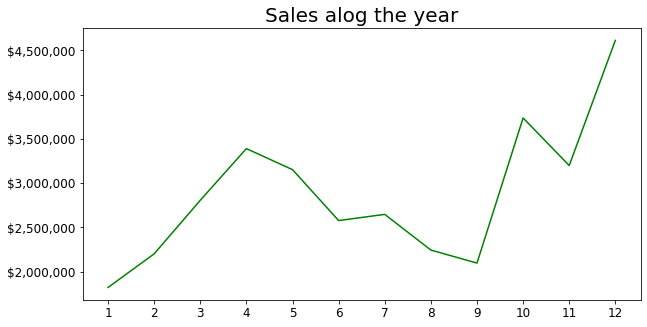

In [16]:
import matplotlib.ticker as ticker
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(data.groupby(data['Date'].dt.month).agg({'Total Order':'sum'}),c='g')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],fontsize=12)

formatter = ticker.FuncFormatter(lambda x,p: '$'+ format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.yticks(fontsize=12)
plt.title('Sales alog the year',fontsize=20);

In [17]:
data.groupby(data['Date'].dt.month_name()).agg({'Total Order':'sum'}).nlargest(5,'Total Order').style.format({'Total Order':'${:,.0f}'})

,Total Order
Date,
December,"$4,613,443"
October,"$3,736,727"
April,"$3,390,670"
November,"$3,199,603"
May,"$3,152,607"


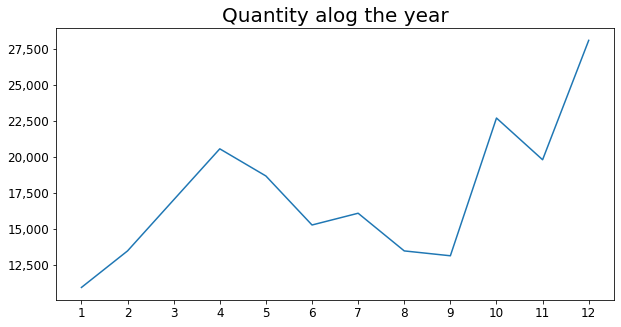

In [18]:
fig,ax = plt.subplots(figsize=(10,5))
plt.plot(data.groupby(data['Date'].dt.month).agg({'Quantity Ordered':'sum'}))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],fontsize=12)

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)


plt.yticks(fontsize=12)
plt.title('Quantity alog the year',fontsize=20);

In [19]:
data.groupby(data['Date'].dt.month_name()).agg({'Quantity Ordered':'sum'}).nlargest(5,'Quantity Ordered').style.format({'Quantity Ordered':'{:,.0f}'})

,Quantity Ordered
Date,
December,"28,114"
October,"22,703"
April,"20,558"
November,"19,798"
May,"18,667"


### City/State with the highest number of sales

   * We had to do first some feature engenieering
       1. Extract: 
           - City
           - State
           - Zip

In [20]:
data['Zip'] = data['Purchase Address'].apply(lambda x:x[-5:])
data['Purchase Address'] = data['Purchase Address'].apply(lambda x:x[:-6])

In [21]:
data['Street'] = data['Purchase Address'].apply(lambda x:x.split(',')[0])
data['City'] = data['Purchase Address'].apply(lambda x:x.split(',')[1])
data['State'] = data['Purchase Address'].apply(lambda x:x.split(',')[2])

In [22]:
data['City'] = data['City'].str.strip()
data['State'] = data['State'].str.strip()

In [23]:
data.drop('Purchase Address',axis=1,inplace=True)

In [24]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Date,Total Order,Zip,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,2019-04-19 08:46:00,23.90,75001,917 1st St,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,2019-04-07 22:30:00,99.99,02215,682 Chestnut St,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,2019-04-12 14:38:00,600.00,90001,669 Spruce St,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,2019-04-12 14:38:00,11.99,90001,669 Spruce St,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,2019-04-30 09:27:00,11.99,90001,333 8th St,Los Angeles,CA


In [25]:
data.groupby(data['City']).agg({'Total Order': 'sum'}).nlargest(3,'Total Order').style.format({'Total Order':'${:,.0f}'})

,Total Order
City,
San Francisco,"$8,262,204"
Los Angeles,"$5,452,571"
New York City,"$4,664,317"


In [26]:
data.groupby(data['State']).agg({'Total Order': 'sum'}).nlargest(3,'Total Order').style.format({'Total Order':'${:,.0f}'})

,Total Order
State,
CA,"$13,714,775"
NY,"$4,664,317"
TX,"$4,587,557"


### Both tables sees almost identical, but let´s review why it happens
   * There´s only 8 States on the dataframe
   * There´s only 8 Cities to on the dataframe

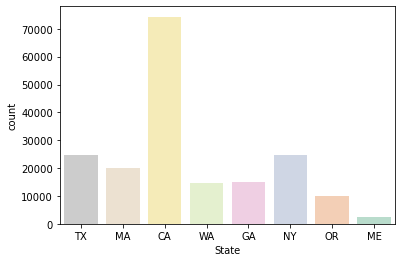

In [27]:
sns.countplot(data=data,x='State',palette='Pastel2_r')

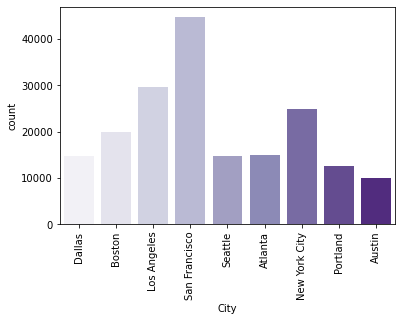

In [28]:
sns.countplot(data=data,x='City',palette='Purples')
plt.xticks(rotation=90);

### If we want to run a campaign what hours would be the best?

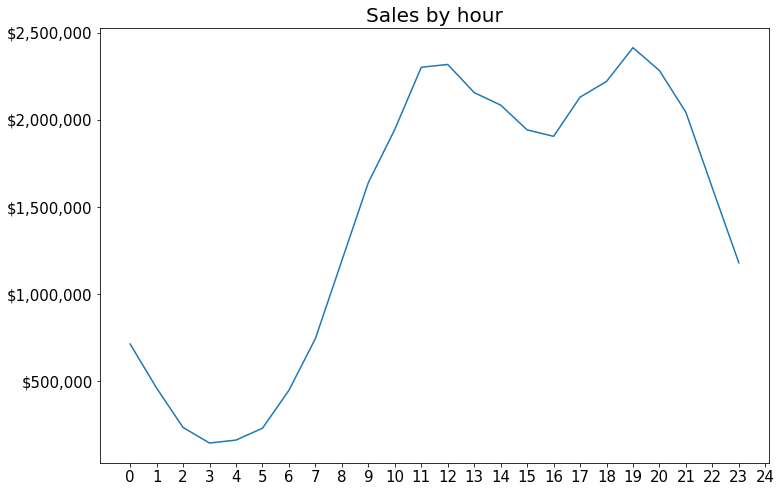

In [30]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(data.groupby(data['Date'].dt.hour).agg({'Total Order':'sum'}))
formatter = ticker.FuncFormatter(lambda x,p: '$'+ format(int(x),','))
ax.yaxis.set_major_formatter(formatter)
plt.title('Sales by hour',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(np.linspace(0,24,25),fontsize=15)

plt.savefig('C:\\Users\\carlo\\Desktop\\Sales by hour.jpg');

In [332]:
data.groupby(data['Product']).agg({'Total Order': 'sum'}).nlargest(3,'Total Order').style.format({'Total Order':'${:,.0f}'})

,Total Order
Product,
Macbook Pro Laptop,"$8,037,600"
iPhone,"$4,794,300"
ThinkPad Laptop,"$4,129,959"


In [333]:
data.groupby(data['Product']).agg({'Quantity Ordered': 'sum'}).nlargest(3,'Quantity Ordered').style.format({'Quantity Ordered':'{:,.0f}'})

,Quantity Ordered
Product,
AAA Batteries (4-pack),"31,017"
AA Batteries (4-pack),"27,635"
USB-C Charging Cable,"23,975"


### Products with the most sales and the pair sold together

In [373]:
data_dup = data[data['Order ID'].duplicated(keep=False)]
data_dup.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Date,Total Order,Zip,Street,City,State
3,176560,Google Phone,1,600.00,04/12/19 14:38,2019-04-12 14:38:00,600.00,90001,669 Spruce St,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,2019-04-12 14:38:00,11.99,90001,669 Spruce St,Los Angeles,CA
18,176574,Google Phone,1,600.00,04/03/19 19:42,2019-04-03 19:42:00,600.00,90001,20 Hill St,Los Angeles,CA
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,2019-04-03 19:42:00,11.95,90001,20 Hill St,Los Angeles,CA
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,2019-04-07 11:31:00,99.99,02215,823 Highland St,Boston,MA
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,2019-04-07 11:31:00,99.99,02215,823 Highland St,Boston,MA


In [374]:
data_dup['Grouped Products'] = data_dup.groupby('Order ID')['Product'].transform(lambda x:' ,'.join(x))
data_dup = data_dup[['Order ID','Grouped Products']].drop_duplicates()
data_dup.head()

<ipython-input-374-396f5816e26c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dup['Grouped Products'] = data_dup.groupby('Order ID')['Product'].transform(lambda x:' ,'.join(x))


,Order ID,Grouped Products
3,176560,"Google Phone ,Wired Headphones"
18,176574,"Google Phone ,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones ,Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack) ,Google Phone"
119,176672,"Lightning Charging Cable ,USB-C Charging Cable"


In [399]:
data['Order ID'].value_counts().nlargest(3)

160873    5
212334    4
242936    4
Name: Order ID, dtype: int64

## Top 10 products sold by group of 3

In [402]:
from itertools import combinations
from collections import Counter 

count = Counter()

for x in data_dup['Grouped Products']:
    row_list = x.split(' ,')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(5):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


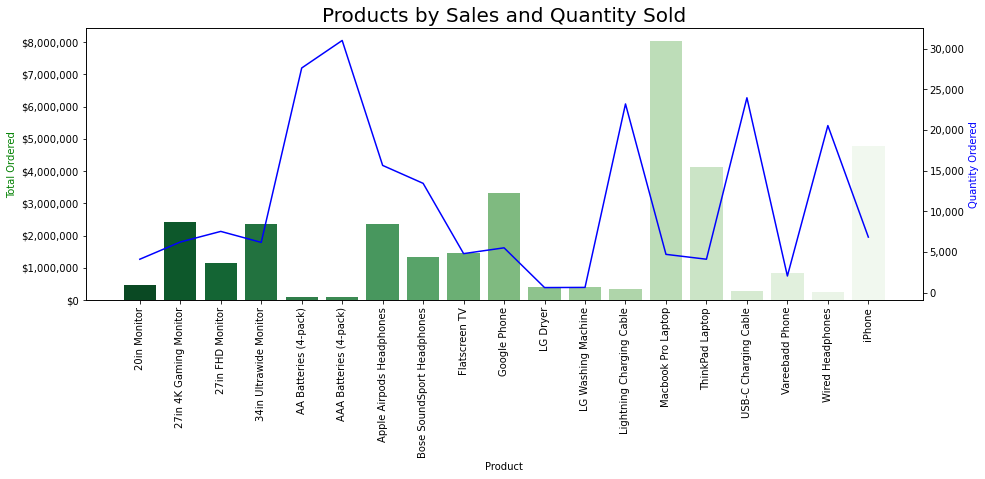

In [393]:
fig,ax = plt.subplots(figsize=(15,5))

ax.set_title('Products by Sales and Quantity Sold',fontsize=20)
products_total = data.groupby(data['Product']).agg({'Total Order': 'sum'})
sns.barplot(data=products_total, x=products_total.index,y=products_total['Total Order'],palette='Greens_r')
formatter = ticker.FuncFormatter(lambda x,p: '$' + format(int(x),','))
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Total Ordered',c='g')
ax.set_xticklabels(products_total.index,rotation=90)

ax2 = ax.twinx()
ax2.plot(data.groupby(data['Product']).agg({'Quantity Ordered': 'sum'}),c='b')
formatter2 = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax2.yaxis.set_major_formatter(formatter2)
ax2.set_ylabel('Quantity Ordered',c='b');